In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("atp_matches_2011.csv")
data.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2011-339,Brisbane,Hard,32,A,20110102,1,104417,1.0,NaN,...,27.0,16.0,12.0,9.0,1.0,4.0,5.0,5580.0,173.0,309.0
1,2011-339,Brisbane,Hard,32,A,20110102,2,103582,NaN,NaN,...,59.0,42.0,20.0,14.0,3.0,5.0,58.0,835.0,75.0,643.0
2,2011-339,Brisbane,Hard,32,A,20110102,3,105051,NaN,Q,...,58.0,42.0,6.0,14.0,4.0,8.0,196.0,263.0,204.0,243.0
3,2011-339,Brisbane,Hard,32,A,20110102,4,104797,8.0,NaN,...,43.0,31.0,17.0,11.0,2.0,3.0,40.0,1031.0,43.0,975.0
4,2011-339,Brisbane,Hard,32,A,20110102,5,103888,4.0,NaN,...,37.0,24.0,11.0,8.0,3.0,6.0,16.0,1991.0,83.0,600.0


In [3]:
def addNewYear(year):   #adding results from a particular year
    return pd.concat([data, pd.read_csv("atp_matches_" + str(year) + ".csv")], ignore_index=True)
#adding years 2012-2023
for i in range(2012, 2024):
    data = addNewYear(i)

In [4]:
data.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2011-339,Brisbane,Hard,32,A,20110102,1,104417,1.0,NaN,...,27.0,16.0,12.0,9.0,1.0,4.0,5.0,5580.0,173.0,309.0
1,2011-339,Brisbane,Hard,32,A,20110102,2,103582,NaN,NaN,...,59.0,42.0,20.0,14.0,3.0,5.0,58.0,835.0,75.0,643.0
2,2011-339,Brisbane,Hard,32,A,20110102,3,105051,NaN,Q,...,58.0,42.0,6.0,14.0,4.0,8.0,196.0,263.0,204.0,243.0
3,2011-339,Brisbane,Hard,32,A,20110102,4,104797,8.0,NaN,...,43.0,31.0,17.0,11.0,2.0,3.0,40.0,1031.0,43.0,975.0
4,2011-339,Brisbane,Hard,32,A,20110102,5,103888,4.0,NaN,...,37.0,24.0,11.0,8.0,3.0,6.0,16.0,1991.0,83.0,600.0


In [5]:
data.size

1708777

In [6]:
#drop redundant columns
data = data.drop(['tourney_id', 'tourney_name', 'draw_size', 'tourney_level', 'winner_entry', 'winner_ht', 'winner_ioc', 'winner_age', 'loser_entry', 'winner_hand', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'best_of', 'winner_seed', 'loser_seed', 'minutes'], axis=1)

In [7]:
data.head()

,surface,tourney_date,match_num,winner_id,winner_name,loser_id,loser_name,score,round,w_ace,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,Hard,20110102,1,104417,Robin Soderling,105992,Ryan Harrison,6-2 6-4,R32,8.0,...,27.0,16.0,12.0,9.0,1.0,4.0,5.0,5580.0,173.0,309.0
1,Hard,20110102,2,103582,Michael Berrer,104534,Dudi Sela,1-6 7-6(3) 6-2,R32,9.0,...,59.0,42.0,20.0,14.0,3.0,5.0,58.0,835.0,75.0,643.0
2,Hard,20110102,3,105051,Matthew Ebden,105357,John Millman,4-6 6-2 6-4,R32,12.0,...,58.0,42.0,6.0,14.0,4.0,8.0,196.0,263.0,204.0,243.0
3,Hard,20110102,4,104797,Denis Istomin,105217,Thiemo De Bakker,7-6(5) 6-4,R32,6.0,...,43.0,31.0,17.0,11.0,2.0,3.0,40.0,1031.0,43.0,975.0
4,Hard,20110102,5,103888,Mardy Fish,105173,Adrian Mannarino,6-1 6-4,R32,11.0,...,37.0,24.0,11.0,8.0,3.0,6.0,16.0,1991.0,83.0,600.0


In [8]:
def parseDate(date):
    #startna tacka 2011
    start = 2011*365
    date = date['tourney_date']
    date = str(date)
    monthMap = {1:0, 2:31, 3:59, 4:90, 5:120, 6:151, 7:181, 8:212, 9:243, 10:273, 11:304, 12:334}
    intDate = int(date[0:4]) * 365 + (int(date[0:4]) - 2009) // 4 + monthMap[int(date[4:6])] + int(date[6:8]) - 1
    if int(date[4:6]) > 2 and int(date[0:4]) % 4 == 0:
        intDate += 1
    intDate = intDate - start
    return intDate

In [9]:
data['tourney_date'] = data.apply(lambda date: parseDate(date), axis=1)

In [10]:
#return all matches of a player sorted by most recent
def get_all_matches(player):
    boolMask = (data['winner_id'] == player) | (data['loser_id'] == player)
    return data[boolMask].sort_values(by = ['tourney_date', 'match_num'], ascending = [False, False])

In [11]:
#return all matches of Novak Djokovic, used for testing
djokovic = get_all_matches(104925)

In [12]:
djokovic.head(80)

,surface,tourney_date,match_num,winner_id,winner_name,loser_id,loser_name,score,round,w_ace,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
34631,Clay,4510,297,208029,Holger Rune,104925,Novak Djokovic,6-2 4-6 6-2,QF,3.0,...,47.0,29.0,14.0,13.0,5.0,10.0,7.0,3865.0,1.0,6775.0
34635,Clay,4510,293,104925,Novak Djokovic,111815,Cameron Norrie,6-3 6-4,R16,3.0,...,38.0,23.0,7.0,9.0,3.0,6.0,1.0,6775.0,13.0,2680.0
34643,Clay,4510,285,104925,Novak Djokovic,105777,Grigor Dimitrov,6-3 4-6 6-1,R32,7.0,...,54.0,34.0,15.0,13.0,9.0,15.0,1.0,6775.0,33.0,1125.0
34659,Clay,4510,269,104925,Novak Djokovic,144869,Tomas Martin Etcheverry,7-6(5) 6-2,R64,1.0,...,43.0,26.0,16.0,10.0,3.0,6.0,1.0,6775.0,61.0,826.0
34509,Clay,4489,297,105583,Dusan Lajovic,104925,Novak Djokovic,6-4 7-6(6),QF,3.0,...,59.0,37.0,14.0,11.0,5.0,7.0,70.0,744.0,1.0,7240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30476,Hard,3987,2,104925,Novak Djokovic,122330,Alexander Bublik,6-3 6-4,RR,4.0,...,39.0,28.0,15.0,9.0,9.0,11.0,1.0,11540.0,36.0,1538.0
30462,Hard,3983,2,104925,Novak Djokovic,105526,Jan Lennard Struff,6-2 6-4,RR,9.0,...,38.0,23.0,9.0,9.0,3.0,6.0,1.0,11540.0,51.0,1134.0
30460,Hard,3982,2,104925,Novak Djokovic,110602,Dennis Novak,6-3 6-2,RR,3.0,...,31.0,18.0,8.0,8.0,2.0,5.0,1.0,11540.0,118.0,621.0
29112,Hard,3971,299,100644,Alexander Zverev,104925,Novak Djokovic,7-6(4) 4-6 6-3,SF,14.0,...,60.0,52.0,13.0,15.0,3.0,4.0,3.0,6540.0,1.0,10940.0


In [13]:
#same as above but for Rafael Nadal
nadal = get_all_matches(104745)
nadal.head(80)

,surface,tourney_date,match_num,winner_id,winner_name,loser_id,loser_name,score,round,w_ace,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
33703,Hard,4398,164,111456,Mackenzie Mcdonald,104745,Rafael Nadal,6-4 6-4 7-5,R64,14.0,...,65.0,40.0,18.0,16.0,3.0,8.0,65.0,775.0,2.0,5770.0
33639,Hard,4398,100,104745,Rafael Nadal,207733,Jack Draper,7-5 2-6 6-4 6-1,R128,6.0,...,67.0,42.0,27.0,18.0,6.0,12.0,2.0,5770.0,38.0,1020.0
33509,Hard,4384,240,200282,Alex De Minaur,104745,Rafael Nadal,3-6 6-1 7-5,RR,3.0,...,56.0,34.0,16.0,14.0,7.0,13.0,24.0,1790.0,2.0,6020.0
33511,Hard,4384,236,111815,Cameron Norrie,104745,Rafael Nadal,3-6 6-3 6-4,RR,6.0,...,55.0,40.0,21.0,14.0,9.0,11.0,14.0,2445.0,2.0,6020.0
33259,Hard,4335,297,104745,Rafael Nadal,134770,Casper Ruud,7-5 7-5,RR,16.0,...,46.0,33.0,10.0,12.0,1.0,3.0,2.0,5820.0,4.0,5020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28516,Clay,3754,288,104745,Rafael Nadal,105777,Grigor Dimitrov,6-1 6-1,R16,3.0,...,25.0,12.0,6.0,7.0,4.0,9.0,3.0,9670.0,17.0,2598.0
28502,Clay,3754,274,104745,Rafael Nadal,105643,Federico Delbonis,6-1 6-2,R32,2.0,...,31.0,17.0,4.0,7.0,6.0,11.0,3.0,9670.0,87.0,884.0
29758,Hard,3691,223,126774,Stefanos Tsitsipas,104745,Rafael Nadal,3-6 2-6 7-6(4) 6-4 7-5,QF,17.0,...,103.0,80.0,28.0,25.0,3.0,5.0,6.0,5965.0,2.0,9850.0
29754,Hard,3691,219,104745,Rafael Nadal,104926,Fabio Fognini,6-3 6-4 6-2,R16,6.0,...,56.0,36.0,18.0,13.0,13.0,19.0,2.0,9850.0,17.0,2535.0


In [14]:
#drop walkovers - not played matches, no interesting data
def drop_WalkOver(df):
    indices_to_drop = df[df['score'] == 'W/O'].index
    return df.drop(index=indices_to_drop)

In [15]:
#drop walkovers for Nadal
nadal = drop_WalkOver(nadal)
nadal.head(80)

,surface,tourney_date,match_num,winner_id,winner_name,loser_id,loser_name,score,round,w_ace,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
33703,Hard,4398,164,111456,Mackenzie Mcdonald,104745,Rafael Nadal,6-4 6-4 7-5,R64,14.0,...,65.0,40.0,18.0,16.0,3.0,8.0,65.0,775.0,2.0,5770.0
33639,Hard,4398,100,104745,Rafael Nadal,207733,Jack Draper,7-5 2-6 6-4 6-1,R128,6.0,...,67.0,42.0,27.0,18.0,6.0,12.0,2.0,5770.0,38.0,1020.0
33509,Hard,4384,240,200282,Alex De Minaur,104745,Rafael Nadal,3-6 6-1 7-5,RR,3.0,...,56.0,34.0,16.0,14.0,7.0,13.0,24.0,1790.0,2.0,6020.0
33511,Hard,4384,236,111815,Cameron Norrie,104745,Rafael Nadal,3-6 6-3 6-4,RR,6.0,...,55.0,40.0,21.0,14.0,9.0,11.0,14.0,2445.0,2.0,6020.0
33259,Hard,4335,297,104745,Rafael Nadal,134770,Casper Ruud,7-5 7-5,RR,16.0,...,46.0,33.0,10.0,12.0,1.0,3.0,2.0,5820.0,4.0,5020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29758,Hard,3691,223,126774,Stefanos Tsitsipas,104745,Rafael Nadal,3-6 2-6 7-6(4) 6-4 7-5,QF,17.0,...,103.0,80.0,28.0,25.0,3.0,5.0,6.0,5965.0,2.0,9850.0
29754,Hard,3691,219,104745,Rafael Nadal,104926,Fabio Fognini,6-3 6-4 6-2,R16,6.0,...,56.0,36.0,18.0,13.0,13.0,19.0,2.0,9850.0,17.0,2535.0
29746,Hard,3691,211,104745,Rafael Nadal,111815,Cameron Norrie,7-5 6-2 7-5,R32,7.0,...,74.0,51.0,7.0,16.0,7.0,12.0,2.0,9850.0,69.0,935.0
29730,Hard,3691,195,104745,Rafael Nadal,111581,Michael Mmoh,6-1 6-4 6-2,R64,7.0,...,46.0,27.0,12.0,12.0,6.0,11.0,2.0,9850.0,177.0,368.0


In [16]:
#parse date - param date is an integer, returns an integer
def parseDateInt(date):
    #startna tacka 2011
    start = 2011*365
    date = str(date)
    monthMap = {1:0, 2:31, 3:59, 4:90, 5:120, 6:151, 7:181, 8:212, 9:243, 10:273, 11:304, 12:334}
    intDate = int(date[0:4]) * 365 + (int(date[0:4]) - 2009) // 4 + monthMap[int(date[4:6])] + int(date[6:8]) - 1
    if int(date[4:6]) > 2 and int(date[0:4]) % 4 == 0:
        intDate += 1
    intDate = intDate - start
    return intDate

In [17]:
#returns a dataframe with the last 10 matches of a player given a date
def getLast10(df, date):
    df = df.drop(df[df['tourney_date'] >= date].index)
    df = df.head(10)
    return df

In [18]:
#returns a dataframe with the mean values of the stats that are important for analysis
'''
def getMeans(df, player):
    new_df = pd.DataFrame(columns=['pl_ace', 'pl_df', 'pl_svpt', 'pl_1stIn', 'pl_1stWon', 'pl_2ndWon', 'pl_SvGms', 'pl_bpSaved', 'pl_bpFaced', 'pl_pts', 'pl_rank'])
    for index, row in df.iterrows():
        making = []
        for n in ['_ace', '_df', '_svpt', '_1stIn', '_1stWon', '_2ndWon', '_SvGms', '_bpSaved', '_bpFaced']:
            making.append(row['w'+n] if row['winner_id'] == player else row['l'+n])
        making.append(row['winner_rank_points'] if row['winner_id'] == player else row['loser_rank_points'])
        making.append(row['winner_rank'] if row['winner_id'] == player else row['loser_rank'])
        new_df.loc[len(new_df)] = making
    mean_values = new_df.mean()
    mean_df = pd.DataFrame(mean_values).transpose()
    return mean_df

def getMeans(df, player):
    winner_mask = df['winner_id'] == player

    new_df = pd.DataFrame()

    for col in ['_ace', '_df', '_svpt', '_1stIn', '_1stWon', '_2ndWon', '_SvGms', '_bpSaved', '_bpFaced']:
        new_col = 'pl' + col
        new_df[new_col] = np.where(winner_mask, df['w' + col], df['l' + col])

    new_df['pl_pts'] = np.where(winner_mask, df['winner_rank_points'], df['loser_rank_points'])
    new_df['pl_rank'] = np.where(winner_mask, df['winner_rank'], df['loser_rank'])

    mean_values = new_df.mean()
    mean_df = pd.DataFrame(mean_values).transpose()
    return mean_df
'''
def getMeans(df, player):
    new_df = pd.DataFrame(columns=['pl_ace', 'pl_df', 'pl_svpt', 'pl_1stIn', 'pl_1stWon', 'pl_2ndWon', 'pl_SvGms', 'pl_bpSaved', 'pl_bpFaced', 'pl_pts', 'pl_rank'])
    for index, row in df.iterrows():
        making = []
        for n in ['_ace', '_df', '_svpt', '_1stIn', '_1stWon', '_2ndWon', '_SvGms', '_bpSaved', '_bpFaced']:
            making.append(row['w'+n] if row['winner_id'] == player else row['l'+n])
        making.append(row['winner_rank_points'] if row['winner_id'] == player else row['loser_rank_points'])
        making.append(row['winner_rank'] if row['winner_id'] == player else row['loser_rank'])
        new_df.loc[len(new_df)] = making
    # Calculate weights based on player rank
    weights = new_df['pl_rank'].copy()
    for index, row in weights.items():
        weights.at[index] = len(weights) - index
    # Compute weighted mean
    mean_values = (new_df.iloc[:, :-2].multiply(weights, axis=0)).sum() / weights.sum()
    mean_values['pl_rank'] = new_df['pl_rank'].mean()
    mean_values['pl_pts'] = new_df['pl_pts'].mean()
    mean_df = pd.DataFrame(mean_values).transpose()
    return mean_df

In [19]:
#returns a dataframe with the mean values of the stats that are important for analysis for a given player and date
def getMatches(playerID, date):
    return getMeans(getLast10(drop_WalkOver(get_all_matches(playerID)), date), playerID)

In [20]:
def makeXY(df):
    # Shuffle the match outcome labels
    match_outcome = np.random.randint(2, size=len(df))
    
    # Make a copy of the input DataFrame and add the shuffled match outcome column
    df_copy = df.copy()
    df_copy["match_outcome"] = match_outcome
    
    y = df_copy['match_outcome']

    X = pd.DataFrame()
    # Loop over each row in the original DataFrame
    for _, row in df_copy.iterrows():
        # Get the ID and date of the winner and loser players
        winner_id = row['winner_id']
        loser_id = row['loser_id']
        tourney_date = row['tourney_date']
        
        # Get the matches played by the winner and loser on the same day as the current match
        if row['match_outcome'] == 1:
            df_winner = getMatches(winner_id, tourney_date)
            df_loser = getMatches(loser_id, tourney_date)
        else:
            df_winner = getMatches(loser_id, tourney_date)
            df_loser = getMatches(winner_id, tourney_date)

        df_winner = df_winner.add_prefix('first')
        df_loser = df_loser.add_prefix('second')
        
        # Merge the winner and loser match histories into a single row of features
        X_new = pd.concat([df_winner, df_loser], axis=1)

        if X.empty:
            X = X_new
        else:
            # Add the match outcome label to the row and append it to the training dataset
            X = pd.concat([X, X_new], axis = 0, ignore_index=True)
    
    #return X, y
    return pd.concat([X, y], axis=1)
'''
def makeXY(df):
    # Shuffle the match outcome labels
    match_outcome = np.random.randint(2, size=len(df))

    # Make a copy of the input DataFrame and add the shuffled match outcome column
    df_copy = df.copy()
    df_copy["match_outcome"] = match_outcome

    y = df_copy['match_outcome']

    def create_features(row):
        winner_id = row['winner_id']
        loser_id = row['loser_id']
        tourney_date = row['tourney_date']

        if row['match_outcome'] == 1:
            df_winner = getMatches(winner_id, tourney_date)
            df_loser = getMatches(loser_id, tourney_date)
        else:
            df_winner = getMatches(loser_id, tourney_date)
            df_loser = getMatches(winner_id, tourney_date)

        df_winner = df_winner.add_prefix('first')
        df_loser = df_loser.add_prefix('second')

        # Merge the winner and loser match histories into a single row of features
        return pd.concat([df_winner, df_loser], axis=1)

    # Apply create_features function to each row in the DataFrame
    X = df_copy.apply(lambda row: create_features(row), axis=1)

    # Concatenate the features and the labels
    return pd.concat([X, y], axis=1)
'''

'\ndef makeXY(df):\n    # Shuffle the match outcome labels\n    match_outcome = np.random.randint(2, size=len(df))\n\n    # Make a copy of the input DataFrame and add the shuffled match outcome column\n    df_copy = df.copy()\n    df_copy["match_outcome"] = match_outcome\n\n    y = df_copy[\'match_outcome\']\n\n    def create_features(row):\n        winner_id = row[\'winner_id\']\n        loser_id = row[\'loser_id\']\n        tourney_date = row[\'tourney_date\']\n\n        if row[\'match_outcome\'] == 1:\n            df_winner = getMatches(winner_id, tourney_date)\n            df_loser = getMatches(loser_id, tourney_date)\n        else:\n            df_winner = getMatches(loser_id, tourney_date)\n            df_loser = getMatches(winner_id, tourney_date)\n\n        df_winner = df_winner.add_prefix(\'first\')\n        df_loser = df_loser.add_prefix(\'second\')\n\n        # Merge the winner and loser match histories into a single row of features\n        return pd.concat([df_winner, df_l

In [21]:
nadalID = 104745
djokovicID = 104925

In [22]:
mean = getMatches(nadalID, 3650)

In [24]:
mean

,pl_ace,pl_df,pl_svpt,pl_1stIn,pl_1stWon,pl_2ndWon,pl_SvGms,pl_bpSaved,pl_bpFaced,pl_rank,pl_pts
0,4.763636,1.454545,81.2,50.6,38.272727,16.381818,13.090909,3.527273,5.272727,2.0,9850.0


In [25]:
XY = makeXY(data)

In [26]:
XY = XY.dropna()

In [27]:
XY.head(60)

,firstpl_ace,firstpl_df,firstpl_svpt,firstpl_1stIn,firstpl_1stWon,firstpl_2ndWon,firstpl_SvGms,firstpl_bpSaved,firstpl_bpFaced,firstpl_rank,...,secondpl_svpt,secondpl_1stIn,secondpl_1stWon,secondpl_2ndWon,secondpl_SvGms,secondpl_bpSaved,secondpl_bpFaced,secondpl_rank,secondpl_pts,match_outcome
93,4.000000,7.000000,87.000000,50.000000,33.000000,19.000000,14.000000,5.000000,10.000000,67.000000,...,134.000000,73.000000,58.000000,31.000000,18.000000,4.000000,5.000000,72.000000,672.000000,1
96,2.500000,0.500000,71.666667,49.833333,35.166667,11.333333,11.166667,4.333333,6.333333,64.000000,...,45.000000,27.000000,17.000000,5.000000,7.000000,2.000000,6.000000,56.000000,844.000000,1
100,9.000000,5.000000,68.000000,30.000000,25.000000,22.000000,11.000000,0.000000,2.000000,57.000000,...,72.000000,43.000000,31.000000,17.000000,11.000000,2.000000,3.000000,43.000000,975.000000,1
103,6.000000,3.000000,64.000000,37.000000,26.000000,11.000000,10.000000,5.000000,9.000000,78.000000,...,63.333333,37.200000,29.466667,14.466667,11.133333,2.733333,4.733333,60.000000,816.000000,1
104,13.600000,2.700000,69.400000,46.100000,33.400000,11.900000,12.000000,3.800000,6.600000,61.000000,...,67.000000,51.000000,33.000000,8.000000,10.000000,1.000000,4.000000,51.000000,915.000000,0
111,1.000000,6.000000,68.000000,37.000000,24.000000,11.000000,8.000000,3.000000,6.000000,83.000000,...,64.000000,37.000000,26.000000,11.000000,10.000000,5.000000,9.000000,78.000000,627.000000,1
120,7.000000,3.000000,55.666667,31.666667,22.666667,10.666667,8.333333,5.000000,7.666667,48.000000,...,58.000000,34.000000,22.000000,6.000000,8.000000,1.000000,5.000000,208.000000,239.000000,1
121,5.000000,2.000000,63.000000,37.000000,27.000000,12.000000,11.666667,3.000000,6.000000,39.000000,...,33.000000,25.000000,10.000000,0.000000,6.000000,1.000000,6.000000,101.000000,551.000000,0
123,3.000000,2.000000,53.000000,30.000000,14.000000,9.000000,9.000000,2.000000,8.000000,45.000000,...,55.000000,34.000000,22.000000,9.000000,9.000000,5.000000,8.000000,79.000000,622.000000,0
124,6.666667,1.333333,61.666667,35.000000,28.000000,14.333333,11.000000,2.000000,3.666667,53.000000,...,58.000000,41.000000,27.000000,12.000000,11.000000,1.000000,3.000000,46.000000,945.000000,0


In [28]:
X, y = XY.drop('match_outcome', axis=1), XY['match_outcome']

In [29]:
X.head()

,firstpl_ace,firstpl_df,firstpl_svpt,firstpl_1stIn,firstpl_1stWon,firstpl_2ndWon,firstpl_SvGms,firstpl_bpSaved,firstpl_bpFaced,firstpl_rank,...,secondpl_df,secondpl_svpt,secondpl_1stIn,secondpl_1stWon,secondpl_2ndWon,secondpl_SvGms,secondpl_bpSaved,secondpl_bpFaced,secondpl_rank,secondpl_pts
93,4.0,7.0,87.000000,50.000000,33.000000,19.000000,14.000000,5.000000,10.000000,67.0,...,7.0,134.000000,73.0,58.000000,31.000000,18.000000,4.000000,5.000000,72.0,672.0
96,2.5,0.5,71.666667,49.833333,35.166667,11.333333,11.166667,4.333333,6.333333,64.0,...,1.0,45.000000,27.0,17.000000,5.000000,7.000000,2.000000,6.000000,56.0,844.0
100,9.0,5.0,68.000000,30.000000,25.000000,22.000000,11.000000,0.000000,2.000000,57.0,...,1.0,72.000000,43.0,31.000000,17.000000,11.000000,2.000000,3.000000,43.0,975.0
103,6.0,3.0,64.000000,37.000000,26.000000,11.000000,10.000000,5.000000,9.000000,78.0,...,0.8,63.333333,37.2,29.466667,14.466667,11.133333,2.733333,4.733333,60.0,816.0
104,13.6,2.7,69.400000,46.100000,33.400000,11.900000,12.000000,3.800000,6.600000,61.0,...,0.0,67.000000,51.0,33.000000,8.000000,10.000000,1.000000,4.000000,51.0,915.0


In [30]:
y.head()

93     1
96     1
100    1
103    1
104    0
Name: match_outcome, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [48]:
X_test = pd.DataFrame(X_test).iloc[:, [10, 21]]

In [46]:
X_train.head()

,10,21
0,0.375549,-0.163645
1,3.098374,7.337812
2,-0.434387,-0.439457
3,2.477551,-0.670287
4,5.464792,0.665408


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.6620637329286798

In [93]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.6615553121577218

In [95]:
logreg.coef_

array([[ 0.        , -0.01898856, -0.25452759,  0.        ,  0.14550504,
         0.07653072,  0.19778158,  0.18074636, -0.30068711, -0.24885225,
         0.5483515 , -0.00745772,  0.03355302,  0.42368785,  0.00343309,
        -0.27702445, -0.12408773, -0.15880478, -0.10674295,  0.18939719,
         0.23665888, -0.53075912]])

In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X, y, cv=10)
print(scores.mean())

0.654098176387288


In [94]:
from sklearn.metrics import confusion_matrix

y_true = y_test  # Ground truth labels
y_pred = logreg.predict(X_test)  # Predicted labels

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[2113 1067]
 [1096 2115]]


In [41]:
djok = getMatches(104925, parseDateInt(20230529))
alca = getMatches(104745, parseDateInt(20230529))
df_winner = alca.add_prefix('first')
df_loser = djok.add_prefix('second')

# Merge the winner and loser match histories into a single row of features
X_new = pd.concat([df_winner, df_loser], axis=1)
y_pred = logreg.predict_proba(X_new)
print(y_pred)

[[0.5855835 0.4144165]]


In [85]:
from sklearn.neighbors import KNeighborsClassifier

# Train your KNN classifier
clf = KNeighborsClassifier(n_neighbors=1000, metric='euclidean')
X_test = pd.DataFrame(X_test)
X_train = pd.DataFrame(X_train)
X_train_pts = X_train.iloc[:, [9, 20]]
X_test_pts = X_test.iloc[:, [9, 20]]
clf.fit(X_train_pts, y_train)

# Test your KNN classifier
y_pred = clf.predict(X_test_pts)
accuracy = clf.score(X_test_pts, y_test)

In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [5, 10, 50, 100, 500, 1000],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_pts, y_train)

# Print the best hyperparameters and accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 1000, 'weights': 'uniform'}
Best accuracy score: 0.6465594313430401


In [86]:
accuracy

0.6491941793146613

In [80]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2.777018,1.471684,1.955432,2.101883,2.816256,1.648373,2.518276,0.003137,-0.523667,-0.529177,...,-0.325217,0.935685,1.191219,1.509063,0.572231,1.331497,-0.549485,-0.519222,-0.487745,0.093768
1,0.716109,-0.819801,-1.442721,-1.034502,-0.697726,-1.775076,-1.222553,-1.465666,-1.525489,-0.527726,...,-0.444206,1.697541,2.479140,2.675903,0.133184,1.698332,0.743419,0.455649,-0.385765,-0.225516
2,-1.181237,-0.675764,-0.574211,-0.441434,-0.554604,-0.959531,-0.636972,0.712644,0.642387,-0.336862,...,-0.034354,-0.876241,-0.774387,-0.718934,-0.911285,-1.028706,-0.172911,-0.502699,0.165523,-0.530056
3,0.529178,1.694285,1.367290,0.904558,1.218409,2.044626,1.381560,0.501036,0.157900,-0.545143,...,-0.510311,-0.025378,-0.483722,-0.212081,1.052872,0.009506,-0.135254,-0.610100,-0.447101,-0.041470
4,0.440386,-0.662670,-0.122037,0.020551,0.184508,-0.729151,0.079504,-0.805950,-0.466186,0.029625,...,1.102652,0.790519,0.595435,0.840448,-0.037813,0.750098,0.542579,0.554789,-0.075388,-0.435796


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6441871381630417


In [29]:
import tensorflow as tf

In [35]:
neuralNet = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (22, )),
    tf.keras.layers.Dense(11, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
neuralNet.compile(optimizer = tf.keras.optimizers.Adam(0.0001), loss = tf.keras.losses.binary_crossentropy, metrics = 'accuracy')

In [36]:
history = neuralNet.fit(
    X_train, y_train, epochs = 20, batch_size = 32, validation_split = 0.2
)

Epoch 1/20


/Users/aleksandarzdravkovic/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]
2023-04-08 12:46:09.762798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


640/640 [==============================] - ETA: 0s - loss: 0.7699 - accuracy: 0.5216

2023-04-08 12:46:14.379403: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


640/640 [==============================] - 6s 8ms/step - loss: 0.7699 - accuracy: 0.5216 - val_loss: 0.7168 - val_accuracy: 0.5320
Epoch 2/20
640/640 [==============================] - 5s 8ms/step - loss: 0.6945 - accuracy: 0.5620 - val_loss: 0.6823 - val_accuracy: 0.5660
Epoch 3/20
640/640 [==============================] - 5s 8ms/step - loss: 0.6671 - accuracy: 0.5917 - val_loss: 0.6661 - val_accuracy: 0.5934
Epoch 4/20
640/640 [==============================] - 5s 8ms/step - loss: 0.6527 - accuracy: 0.6114 - val_loss: 0.6566 - val_accuracy: 0.6084
Epoch 5/20
640/640 [==============================] - 5s 8ms/step - loss: 0.6437 - accuracy: 0.6217 - val_loss: 0.6506 - val_accuracy: 0.6161
Epoch 6/20
640/640 [==============================] - 5s 8ms/step - loss: 0.6375 - accuracy: 0.6291 - val_loss: 0.6461 - val_accuracy: 0.6204
Epoch 7/20
640/640 [==============================] - 5s 8ms/step - loss: 0.6331 - accuracy: 0.6354 - val_loss: 0.6430 - val_accuracy: 0.6235
Epoch 8/20
640/64

In [60]:
pred = neuralNet.predict(X_test)

 60/200 [========>.....................] - ETA: 0s

2023-03-29 15:54:58.304527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - 1s 3ms/step


In [61]:
cm = confusion_matrix(y_test, (pred >= 0.5))
print(cm)

[[2130 1050]
 [1136 2075]]


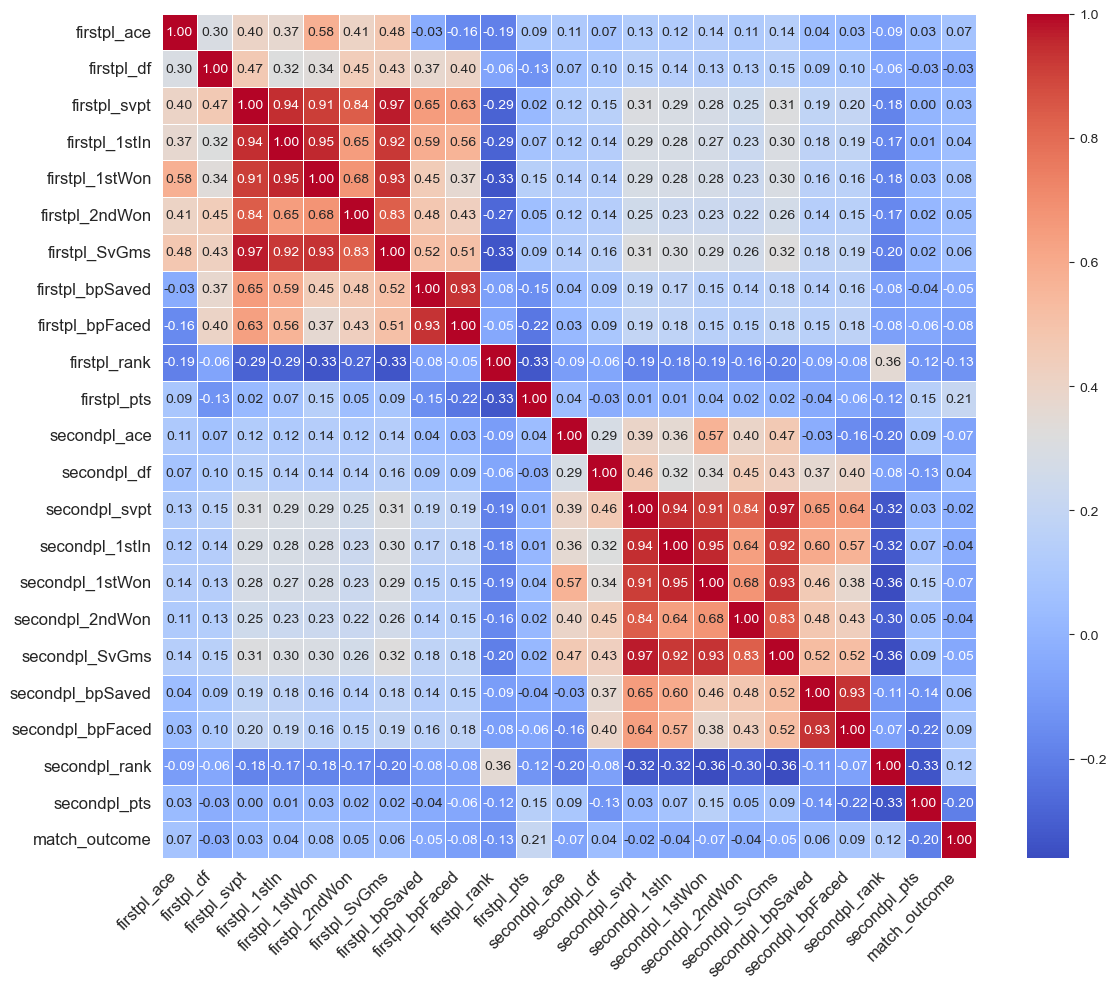

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
# Combine X and y data frames
XY_combined = pd.concat([X, y], axis=1)

# Plot correlation matrix using heatmap
corr_matrix = XY_combined.corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax, fmt='.2f', linewidths=.5)

# Adjust plot settings and show plot
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

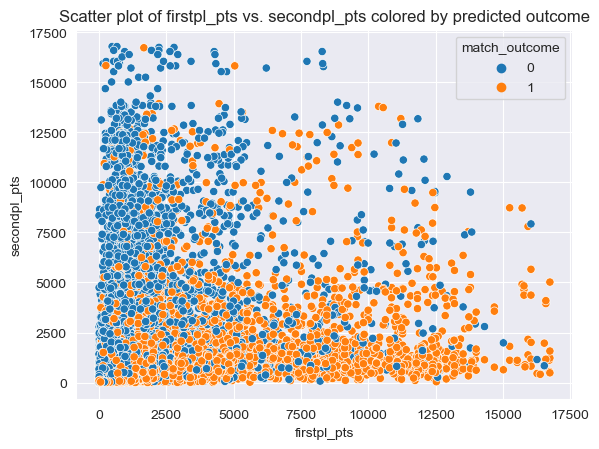

In [68]:
feat1 = 'firstpl_pts'
feat2 = 'secondpl_pts'

# create a new figure and axis object
fig, ax = plt.subplots()

# create a scatter plot with color based on the predicted outcome
sns.scatterplot(x=feat1, y=feat2, hue='match_outcome', data=XY, ax=ax)

# set the axis labels and title
ax.set_xlabel(feat1)
ax.set_ylabel(feat2)
ax.set_title('Scatter plot of {} vs. {} colored by predicted outcome'.format(feat1, feat2))

# show the plot
plt.show()